(32, 375, 500, 3)
(<tf.Tensor 'Const_2:0' shape=(2, 20, 20, 1) dtype=float32>, <tf.Tensor 'Print:0' shape=(2, 10, 10, 3) dtype=float32>, <tf.Tensor 'RoiPool:0' shape=(2, 10, 10, 3) dtype=float32>, <tf.Tensor 'RoiPool:1' shape=(2, 10, 10, 3) dtype=int32>)


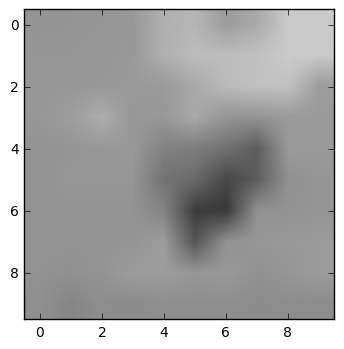

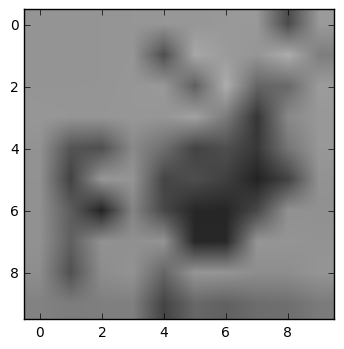

In [6]:
import tensorflow as tf
import numpy as np
import roi_pooling_op
import roi_pooling_op_grad
from roi_align import roi_align
import tensorflow as tf


def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


array = np.tile(img, [32,1,1,1])
print(array.shape)
data = tf.convert_to_tensor(array, dtype=tf.float32)
data = tf.image.resize_images(data, np.array(img.shape[:2]) / 4.0)
rois = tf.convert_to_tensor([[0, 150.5, 150.5, 300, 300], [31, 30, 30, 40, 40]], dtype=tf.float32)

W = weight_variable([3, 3, 3, 1])
h = conv2d(data, W)

[y2, argmax] = roi_pooling_op.roi_pool(data, rois, 10, 10, 1.0 / 4.0)
[y, _] = roi_align(data, rois, 10, 10, 1.0 / 4.0)

with tf.control_dependencies([y2]):
  y = tf.Print(y, [y, y2], summarize=20)

y_data = tf.convert_to_tensor(np.ones((2, 20, 20, 1)), dtype=tf.float32)
print(y_data, y, y2, argmax)


# Launch the graph.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=False))

img_scaled_pool = sess.run(y2)[0]
img_scaled_align = sess.run(y)[0]

plt.imshow(img_scaled_pool)
plt.show()
plt.imshow(img_scaled_align)
plt.show()
#with tf.device('/gpu:0'):
#  result = module.roi_pool(data, rois, 1, 1, 1.0/1)
#  print result.eval()
#with tf.device('/cpu:0'):
#  run(init)


In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

img=mpimg.imread('stinkbug.png')
print(img.shape)
plt.imshow(img[31,150:300,150:300,:])
plt.show()

(375, 500, 3)


IndexError: too many indices for array

2.49
(<tf.Tensor 'Const_82:0' shape=(2, 20, 20, 1) dtype=float32>, <tf.Tensor 'Print_19:0' shape=(1, 10, 10, 1) dtype=float32>, <tf.Tensor 'RoiPool_20:0' shape=(1, 10, 10, 1) dtype=float32>, <tf.Tensor 'RoiPool_20:1' shape=(1, 10, 10, 1) dtype=int32>)


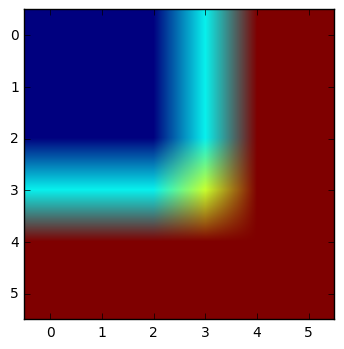

(10, 10)


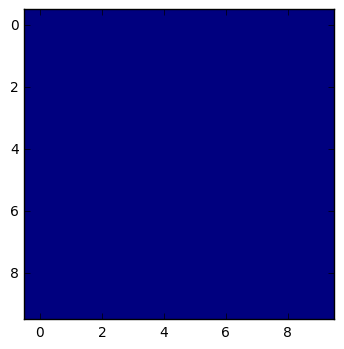

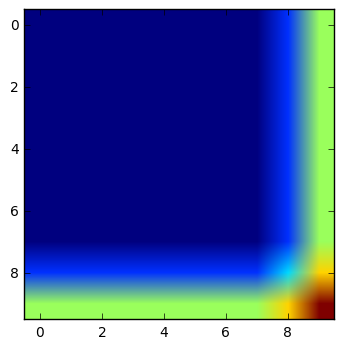

In [37]:
img_2 = np.ones((128, 128))
img_2[:16,:16] = 0
stride = float(25) / float(128)

rois_v =  2.49 / stride

rois = tf.convert_to_tensor([[0, 0, 0, rois_v, rois_v]], dtype=tf.float32)
data = tf.convert_to_tensor(img_2.reshape((1,128,128,1)), dtype=tf.float32)
feat = tf.image.resize_images(data, [25, 25])




print(rois_v * stride)

[y2, argmax] = roi_pooling_op.roi_pool(feat, rois, 10, 10, stride)
[y, _] = roi_align(feat, rois, 10, 10, stride)

with tf.control_dependencies([y2]):
  y = tf.Print(y, [y, y2], summarize=20)

y_data = tf.convert_to_tensor(np.ones((2, 20, 20, 1)), dtype=tf.float32)
print(y_data, y, y2, argmax)


# Launch the graph.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=False))

plt.imshow(sess.run(feat)[0,:6,:6,0])
plt.show()

img_scaled_pool = sess.run(y2).reshape(10,10)
img_scaled_align = sess.run(y).reshape(10,10)

print(img_scaled_pool.shape)
plt.imshow(img_scaled_pool)
plt.show()
plt.imshow(img_scaled_align)
plt.show()